<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
</h2>
</br>
<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
</h2>

<h1 style='font-family: Optima;color:#ecac00'>
02 Exploratory Data Analysis
</h1  

## <span style='background:yellow; color:red'> Remember:</span>

+ Navigate to your `fmad2223` folder in the console  
+ Execute `git pull origin main` to update the code
+ **Do not modify the files in that folder**, copy them elsewhere

# Working with Data Files.

## Basic Data Files (txt, csv) with pandas.

+ We will begin by downloading one of these files, called `movies.csv` containing information about the top watched films (in theaters) between 2007 and 2011. 

+ We strongly recommend that you always create a project specific `data` folder and store all the downloaded data files for each project in there. In our case you can keep this folder as a subfolder of the *Course Folder*. In particular, do not place the files inside the *Common Repository folder* (the one named *fmad2223*). Use the following link to download the data file (it is advised to use the right button of your mouse and choose an option such as "download the linked file as..."):  
    [movies.csv](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv)

+ Before proceeding to read the file with Python **you should always begin examining the contents of a data file with a text editor** (such as Notepad++ in Windows or BBedit in Mac). Not doing so will often result in bad data processing downstream. And please refrain from using spreadsheets (such as Excel) for this exploratory tasks. Not only will it fail too often, in some cases it can lead to data loss.  

+ In this case opening the file in a text editor (BBedit in the Mac here) shows something like this (only the first few lines are shown):
![](fig/010-movies_csv_open_text_editor.png)
There are some key ingredients of such files that you need to pay attention to here, even in simple cases like this first example:
    + Each line of the file corresponds to a row of the data table. 
    + The first line or *header* is often a special line, containing the names of the table columns. In the best case scenario these correspond to the variables in our data.
    + The individual column values in every line are separated by a fixed symbol: a comma, a semicolon, a space or tab, etc. This will be called the *separator* and it is critical to determine which one was used in each data file. For movies.csv the separator is a comma.
    
+ Now that we have some information about the file we are ready to load it into a pandas Dataframe, that we will also call `movies`. Note that we first need to import pandas. 

In [147]:
import pandas as pd

movies = pd.read_csv('data/movies.csv', sep=",", header=0)

print(movies.head())

                                 Film   Genre            Lead Studio  \
0                     Youth in Revolt  Comedy  The Weinstein Company   
1  You Will Meet a Tall Dark Stranger  Comedy            Independent   
2                        When in Rome  Comedy                 Disney   
3               What Happens in Vegas  Comedy                    Fox   
4                 Water For Elephants   Drama       20th Century Fox   

   Audience score %  Profitability  Rotten Tomatoes % Worldwide Gross  Year  
0                52       1.090000                 68         $19.62   2010  
1                35       1.211818                 43         $26.66   2010  
2                44       0.000000                 15         $43.04   2010  
3                72       6.267647                 28        $219.37   2008  
4                72       3.081421                 60        $117.09   2011  


+ The arguments `sep` and `header` provide the pandas [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the information we discovered in our initial file exploration. If you run the function like this:

    ```python
    movies = pd.read_csv('data/movies.csv')
    ```
    pandas will try to *guess* which separator to use and whether or not there is a header line. This `movies.csv` file is such an easy example that the code will work either way. But be warned: this will sometimes fail and when working with many large files the guessing adds an unnecessary overhead to the process. 

**Exercise:** 

+ using the commands we saw in `01a_test_your_setup` find out the shape (rows, columns) of this DataFrame.
+ use the bracket selection (with `loc` or `iloc`) to get the `Genre` information for the movies from year 2010. What type of object did you obtain?

In [220]:
# %load "./exclude/S02-001.py" 

### Reading the csv file from a URL (link)

+ Sometimes it is simpler to skip the download part of the process and read the data directly from a link. Keep in mind, however, that for this to work the same caveats as before apply: it is better to explicitly set the separator, to know beforehand if there is a header in the file, etc.

+ Let us see a classic example: the `mpg` data set can be downloaded [in csv format with this link](https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv). This data set contains information about fuel consumption (miles per gallon, thus mpg) and other characteristics of some car models from 1999 to 2008. You can read more aboout it and the variables it contains [in this link](https://ggplot2.tidyverse.org/reference/mpg.html).

+ We use this example to show that we can use the link to the csv file as argument for pandas `read_csv`:

In [149]:
mpg_link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv"
mpg = pd.read_csv(mpg_link)

print(mpg.head())

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


### Creating and saving a csv file

+ Next let us begin by creating a pandas DataFrame with synthetic data. Learning to create such objects is an essential part of the data analysis skills required in this course. You will often need to simulate data with prescribed stratistical properties in order to perform computer experiments. These are in turn the key to understand the expected behavior in many real world problems. 

+ The NumPy and Scipy modules offer many tools for statistical modeling, and we will be meeting many of these tools in the next sessions. Here we begin with a simple example in which we use NumPy. You can [use this link](https://numpy.org/doc/1.16/reference/routines.random.html) to read the documentation for the functions we use and to get a first idea of the possibilities. For the time being it is ok if you don't fully understand some of the words below. We will discuss these issues later in the course:
    + The `np.random.randint` function to generate 100 random integers between 1 and 20 (both included, of course with replacement). These become the pandas Series `A`. Recall that each column of a Data.Frame is a Series.
    + The `str.ascii_lowercase` string contains all the English alphabet lower case letters. We use a list comprehension to convert that to a NumPy array and then use `np.random.choice` to select 100 random letters with replacement. These form the Series `B`.
    + Finally we use `np.random.random_sample` to obtain 100 random floating values uniformly distributed in the $[-4, 4]$ interval. These form the Series `C`.
    

In [150]:
import numpy as np
np.random.seed(2022)  # seed for reproducibility

# 100 random integers
A = pd.Series(np.random.randint(low = 1, high = 7, size = 100))

# 100 random lowercase letters
import string as str
alphabet_string = str.ascii_lowercase
alphabet = np.array([alphabet_string[i] for i in range(len(alphabet_string))])
B = pd.Series(np.random.choice(alphabet, size=100))

# 100 random floats in [-4, 4]
C = pd.Series(8 * np.random.random_sample(size=100) - 4)


# Use the above as columns for a DataFrame
X = pd.DataFrame({'A':A, 'B':B, 'C':C})
print(X.head(n=10))

   A  B         C
0  6  k  1.612108
1  5  m  2.581690
2  6  z  1.908050
3  1  v  3.903152
4  2  x -2.726556
5  2  y  3.904638
6  1  a  1.810280
7  1  w  0.800752
8  3  y -2.733084
9  1  i -3.413324


+ Now that we have created this DataFrame we can save it to a csv file. To identify it we will name that file `EDA_data_saving.csv` (in the `data` folder). Every pandas DataFrame has a `to_csv` method that we can use for this. Run the following command and then use a text editor (Notepad++, BBEdit or similar) to check that the contents are what you expect. Make sure to check the header line, the separator and the number of lines.

In [151]:
X.to_csv("data/EDA_data_saving.csv", sep=";", index=False)

+ **Exercise:** change the separator to a comma and set `index = True`. Then run the code and check the changes. 

    In general we recommend setting `index=False` unless you have a good reason not to. These makes reading the csv files in other programs easier. Be careful because the default behavior is `index=True`. 


In [152]:
# %load "./exclude/S02-002.py" 

## Excel Files

+ Excel files are frequently used as a data source in some contexts. For simple files, reading their content into a pandas DataFrame is quite straightforward. But for more complex cases things can get more complicated. However, to keep things simple here we will use a simple file containing data about 2010 train accidents in the US. You can download the file (to the data folder) using [right-click in this link](http://users.stat.ufl.edu/~winner/data/train_acc_2010.xls). And the meaning of the variables in this dataset is [clarified by this link](https://users.stat.ufl.edu/~winner/data/train_acc_2010.txt)


+ First we need to install an additional module into the fmad environment. This will often be the case when reading data from other sources. Do you remember how to install new modules?
  **Exercise:** install the module called `xlrd` into the fmad environment.

In [153]:
# %load "./exclude/S02-003.py" 

+ Then run this code to read the data:

In [154]:
xlsx_file = './data/train_acc_2010.xls'

train_accidents = pd.read_excel(xlsx_file)

print(train_accidents.head())

   Acident Railroad  Month  Day State      County TrkType TrkMnt AccType  \
0        1      NS       1    1   KY      KENTON    Main     NS     Der    
1        2     ATK       1    2   CA     ALAMEDA    Yard    ATK     Oth    
2        3    BNSF       1    2   MT      DAWSON    Yard   BNSF     Der    
3        4    BNSF       1    2   OK       TULSA    Yard   BNSF     Der    
4        5    MNCW       1    2   CT   FAIRFIELD    Main   MNCW     Oth    

  AccCause  EqpDamg  TrkDamg  Killed  Injured           RREquip  Speed  \
0        T     8485   333700       0        0    FREIGHT TRAIN      24   
1        M  1500000        0       0        0  PASSENGER TRAIN       0   
2        H   103833    17615       0        0    FREIGHT TRAIN      10   
3        M    15000    50000       0        0    LIGHT LOCO(S)       4   
4        E     9964      750       0        0  PASSENGER TRAIN      45   

   LocosDer  CarsDer  
0         0       13  
1         0        0  
2         0        6  
3     

+ You can read the [documentation for the `read_excel` function here](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html). The examples therein will show you how to select a particular range of rows and columns in the spreadsheet and how to deal with the case when there are several sheets of data in the Excel file. And if you need to export directly from Python to Excel [read about the `to_excel` method here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)

### Data Files from Other Programs

+ Eventually you may find yourself trying to import data stored in the file format used by some statistical software. In such cases, *the Web is your friend*. Look for help for importing that specific type of file into a pandas DataFrame. In fact, let us do this right now as an exercise:  
    **Exercise:** the [`auto2.dta` file in this link](http://www.stata-press.com/data/r15/auto2.dta) is a data file stored in *Stata* format. Download the file to your data folder and look for a way to import this into a pandas DataFrame (call it `auto2` as well, we will use it later). **Warning:** Some of the cells below will not work until you complete these exercise.

In [222]:
# %load "./exclude/S02-004.py" 

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,Average,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,Average,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,Average,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,Good,4.0,20,4080,222,43,350,2.41,Domestic
5,Buick LeSabre,5788,18,Average,4.0,21,3670,218,43,231,2.73,Domestic
6,Buick Opel,4453,26,NaN,3.0,10,2230,170,34,304,2.87,Domestic
7,Buick Regal,5189,20,Average,2.0,16,3280,200,42,196,2.93,Domestic
8,Buick Riviera,10372,16,Average,3.5,17,3880,207,43,231,2.93,Domestic
9,Buick Skylark,4082,19,Average,3.5,13,3400,200,42,231,3.08,Domestic


# Different Types of Data

+ The data sets we are beginning to see in these examples follow the two most basic rules of what is called *Tidy Data* (a term coined by Hadley Wickham in 2014):
    + Each column of the table corresponds to a *variable*.
    + Each row corresponds to an *observation*, *individual*, *case* or *sample*. All these terms refer to a single observational unit of whatever it is that we are considering.
    
+ The variables can be of different types: integer or floating point numbers, dates, binary variables (yes/no type), text strings, labels, dates, positions, etc. Those different types of variables allow for different operations and need specific treatment in many cases, if we are to get out of them as much information as possible. 

+ In the next sections we will meet the basic types of data (variables) and the best way to describe them. We will be using some of the examples that we have already seen and some others like the ones introduced here:

    + The framingham data set contains health data from a heart disease study that took place in Framingham (UK). [This link contains the csv file URL](https://raw.githubusercontent.com/mbdfmad/fmad2122/main/data/framingham.csv) and you can [read more about the study and the variables in the table here](https://biolincc.nhlbi.nih.gov/media/teachingstudies/FHS_Teaching_Longitudinal_Data_Documentation.pdf?link_time=2019-08-26_14:42:24.487245).
    + The `flights` data set contains information about flights that departed from New York in 2013. [This link contains the csv file URL](https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/flights/flights.csv). You can read more about this data set [in this link](https://rdrr.io/cran/nycflights13/man/flights.html).
    

+ **Exercise:** using the URLs above directly (without downloading) load these data sets into two pandas DataFrames called, respectively, `framingham` and `flights`.   **Warning:** Some of the cells below will not work until you complete these exercise.

In [156]:
# %load "./exclude/S02-005.py" 

In [157]:
print(framingham.columns)
print(framingham.head())
print(framingham.describe())
print(framingham.shape)

NameError: name 'framingham' is not defined

In [158]:
print(flights.columns)
print(flights.head())
print(flights.describe())
print(flights.shape)

NameError: name 'flights' is not defined

## The `info` method

+ When we start exploring a new data set one of the first things we should do, is find out the size of the table (e.g. using the `shape` method) and **what types of data it contains**. The `info` method from `pandas` is usually a good starting point. Let us see how it works with the `train_accidents` data set:

In [159]:
train_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Acident   2621 non-null   int64 
 1   Railroad  2621 non-null   object
 2   Month     2621 non-null   int64 
 3   Day       2621 non-null   int64 
 4   State     2621 non-null   object
 5   County    2621 non-null   object
 6   TrkType   2621 non-null   object
 7   TrkMnt    2621 non-null   object
 8   AccType   2621 non-null   object
 9   AccCause  2621 non-null   object
 10  EqpDamg   2621 non-null   int64 
 11  TrkDamg   2621 non-null   int64 
 12  Killed    2621 non-null   int64 
 13  Injured   2621 non-null   int64 
 14  RREquip   2621 non-null   object
 15  Speed     2621 non-null   int64 
 16  LocosDer  2621 non-null   int64 
 17  CarsDer   2621 non-null   int64 
dtypes: int64(10), object(8)
memory usage: 368.7+ KB


+ The output shows that the numeric variables in this table have all been read as integers (`Dtype int64`) while the variables whose values are character strings have been read as `Dtype object`. When reading data from other files and sources we will come across other Python data types (e.g. floats). 

+ **Exercise:** apply the `info` method to the following data sets:
    + `movies`
    + `X`
    + `framingham`
    + `flights`
    
    Look at the results and think about the variables in those data sets. How many different kinds of data can you find? Can you think of another types of data not present in those examples?

In [160]:
# %load "./exclude/S02-006.py" 

## Preliminary Classification of Variables. 

+ Let us pause here to think about the kind of data types in the examples we have seen. Many (but not all) of the variables / columns in the data tables fit into one of these categories:
    + **Quantitative or Numeric Variables**. That means that the values of these variables are *numbers that have been measured in a meaningful scale, such that the operations with this numbers have meaning*. Numeric variables are further divided into **Discrete** and **Continuous** variables. We will discuss this with detail below.
    + **Qualitative Variables or Factors**. The values of these variables are *labels* and they are used to *group the observations into classes*. A typical example would be grouping bird observations into species. The name of a species is a label, but it makes no sense to sum (or take the mean of) an ostrich and a sparrow. Even if the labels are sometimes numeric, operations have no sensible interpretation in relation with the data (we will see however an exception for binary variables when discussing proportions).  

+ A numeric variable is **discrete** if there is a minimal or atomic unit of measurement such that all values of the variable are multiples of that unit. For example, when counting the coins in your wallet it makes no sense to say you have 3.5 coins. You may have 3 or 4, but no "fraction of a coin" counts as a coin.

+ On the other hand a numeric variable is **continuous** if its values are measured in a floating point (decimal) scale, such that given two values then any intermediate values is, in principle, a possible value for the variable. 

+ We will see, however, that the division between discrete and continuous is not always as clear cut as it may appear at first. At the end of the day, it is usually a modeling choice. We will see many examples of why this happens. 

+ **Exercise / Discussion.** Look at the variables in some of the tables from the previous examples. How do they fit this types of variables? Are they quantitative or are they factors? In the case of numeric variables, do you consider them continuous or discrete?

# Discrete (Quantitative) Variables

## Frequency Tables

+ Let us look at the synthetic `X` DataFrame that we created before. The `A` variable is one example of a discrete numeric variable, as it only takes integer values (and few different values; more on this later). The first step in the exploration of a discrete variable is to obtain an **absolute frequency table**. For each value of the variable, this table counts the number of appearances of that value in the table. In pandas you can get it using the `crosstab` function:

In [161]:
AbsFreq_X = X['A'].value_counts()
AbsFreq_X

6    22
1    20
2    17
3    16
5    13
4    12
Name: A, dtype: int64

+ Note that the values in the table are not sorted by the size (they are jsut ordered by their order of appearance in the table). We will often want them ordered, especially in this case case of numeric variables. To get this ordered frequency table use:

In [162]:
AbsFreq_X = X['A'].value_counts().sort_index()
AbsFreq_X

1    20
2    17
3    16
4    12
5    13
6    22
Name: A, dtype: int64

+ Absolute frequencies are often simply called *counts*. Of course the sum of the absolute frequencies equals the numer of rows:

In [163]:
print(sum(AbsFreq_X))

100


+ Absolute frequencies depend on the size of the whole data set. Sometimes, and specially when comparing two data sets, it is better to use *relative frequencies*. These are the answer to questions of like "*What proportion of the values are equal to...?*" In pandas you can easily modify `value_counts` to get the relative frequencies or proportions:

In [164]:
RelFreq_X = X['A'].value_counts(normalize=True).sort_index()
RelFreq_X

1    0.20
2    0.17
3    0.16
4    0.12
5    0.13
6    0.22
Name: A, dtype: float64

In [165]:
print(sum(RelFreq_X))

1.0


### Some comments about relative frequencies

+ Relative frequencies always add up to one. They are closely related to percents, but instead of using 100 as the total, we are using 1. 
+ More importantly, *relative frequencies are deeply connected with the first intuitive ideas about probability*. That is: imagine that you were to pick at random a row of the `X` table. What is the probability that the value of `A` in that row is 4. The relative frequency table tells us that we expect the value 4 to appear in 12 out of every 100 repetitions of that experiment.  

### Cumulative frequencies (absolute and relative)

+ Cumulative frequencies are used to respond to questions like "how many values are lower than ...?" os the analogous question in terms of proportions. We can easily obtain cumulative results using the `cumsum` method. Let us use it to get cumulative frequencies for `X`, both absolute and relative: 

In [166]:
CumAbsFreq_X = AbsFreq_X.cumsum()
CumAbsFreq_X

1     20
2     37
3     53
4     65
5     78
6    100
Name: A, dtype: int64

In [167]:
CumRelFreq_X = RelFreq_X.cumsum()
CumRelFreq_X

1    0.20
2    0.37
3    0.53
4    0.65
5    0.78
6    1.00
Name: A, dtype: float64

+ The final cumulative frequency is always the total number of rows in the data set (in the absolute case) or 1 (in the relative case).

## Plots for discrete variables

+ The basic and recommended graphical representation for a discrete variable is the *bar plot*. We will illustrate this with the `A` variable of `X`. We also import `seaborn` and use it first to set a nice plotting style. You can comment out the first two lines and rerun this notebook to see how the plot changes. But remember to import `seaborn` afterwards, as we will need it in some cells below this one:

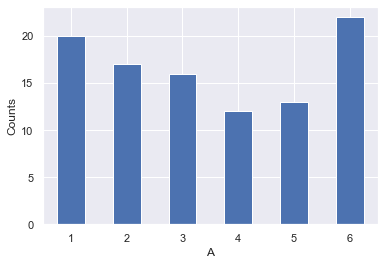

In [168]:
import seaborn as sns
sns.set()
plot = AbsFreq_X.plot.bar(rot=0, xlabel='A', ylabel ='Counts')

$\quad$ The only difference when plotting the relative frequencies is the scale in the vertical axis.
    
+ The bar plot in this example gives us a visual summary of the *shape* of the data. In other words, we can see how the data is distributed among the different possible values. We will talk a lot about *distributions* in this course, and you can consider this humble bar plot as the first step in that direction.

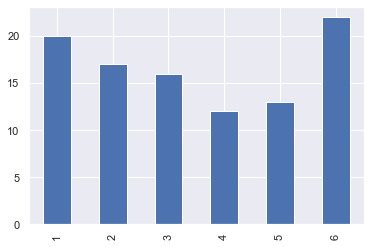

In [169]:
sns.set()
plot = X['A'].value_counts().sort_index().plot.bar()

# Continuous (Quantitative) Variables

+ We will first consider variables that are clearly treated as continuous in the data set. For example, the `C` variable in `X` was designed that way. For such a variable, frequency tables make no sense. Most values of such variables will appear only once in the table, making almost every absolute frequency equal to 1. We need a different set of tools for these variables.

+ The simplest idea is to reduce the continuous variables to discrete ones using `binning`. That is we divide all  values of the variable into *bins*, which are a collection of intervals that span all possible values. In our present example, the variable `C` was designed to take random values in the $[-4, 4]$ interval. Thus we will divide that interval into a collection of subintervals or bins. How many bins? Well, that is not a simple question, because the answer depends on both the specific data and what you are trying to accomplish. A rule of thumb is not to use less than five bins and no more than $\sqrt{n}$, where $n$ is the number of data points for your variable. In our case we will divide $[-4, 4]$ into eight subintervals or bins and we will assign each value of `C` to the corresponding subinterval. We can do that with the pandas cut function. We will first apply it naïvely to the variable and see what happens:

In [170]:
pd.cut(X['C'], 8)

0       (1.012, 2.008]
1       (2.008, 3.004]
2       (1.012, 2.008]
3         (3.004, 4.0]
4     (-2.971, -1.975]
            ...       
95        (3.004, 4.0]
96     (-1.975, -0.98]
97      (1.012, 2.008]
98     (0.0163, 1.012]
99     (-1.975, -0.98]
Name: C, Length: 100, dtype: category
Categories (8, interval[float64, right]): [(-3.975, -2.971] < (-2.971, -1.975] < (-1.975, -0.98] < (-0.98, 0.0163] < (0.0163, 1.012] < (1.012, 2.008] < (2.008, 3.004] < (3.004, 4.0]]

As you can see, the result is a Panda Series that contains the subinterval assigned to the corresponding values in `C`. But the endpoints of these intervals depend too much on the specifics of our data. Remember that these were randomly chosen in the $[-4, 4]$ interval. If we were to choose another sample of random points in the same interval, these endpoints probably wouldn't do. Thus we go back to `cut` but this time we explicitly set the endpoints of the bins (we call them *nodes* here), as a NumPy array. 

In [171]:
C_nodes = np.arange(-4, 5, 1)
print(C_nodes)

pd.cut(X['C'], bins=C_nodes, ordered=True)

[-4 -3 -2 -1  0  1  2  3  4]


0       (1, 2]
1       (2, 3]
2       (1, 2]
3       (3, 4]
4     (-3, -2]
        ...   
95      (3, 4]
96    (-2, -1]
97      (1, 2]
98      (0, 1]
99    (-2, -1]
Name: C, Length: 100, dtype: category
Categories (8, interval[int64, right]): [(-4, -3] < (-3, -2] < (-2, -1] < (-1, 0] < (0, 1] < (1, 2] < (2, 3] < (3, 4]]

That looks much better. Note that we also took the chance to instruct Python to keep the subintervals ordered. In fact, the 'C_binned' variable is now an *ordered factor*, a concept that we will discuss below. We can now add that column to the DataFrame in a very simple way:

In [172]:
X['C_binned'] = pd.cut(X['C'], bins=C_nodes, ordered=True)
print(X.head(10))

   A  B         C  C_binned
0  6  k  1.612108    (1, 2]
1  5  m  2.581690    (2, 3]
2  6  z  1.908050    (1, 2]
3  1  v  3.903152    (3, 4]
4  2  x -2.726556  (-3, -2]
5  2  y  3.904638    (3, 4]
6  1  a  1.810280    (1, 2]
7  1  w  0.800752    (0, 1]
8  3  y -2.733084  (-3, -2]
9  1  i -3.413324  (-4, -3]


This `C_binned` variable is a factor (a qualitative variable), because its values are not numbers, but labels (the names of the subintervals). We will discuss factors below, but for now suffice it to say that we can also use the concept of frequencies with factors. We get this table (again, the order is taken into account):

In [173]:
X['C_binned'].value_counts().sort_index()

(-4, -3]    14
(-3, -2]    14
(-2, -1]    12
(-1, 0]      9
(0, 1]      10
(1, 2]      13
(2, 3]       9
(3, 4]      19
Name: C_binned, dtype: int64

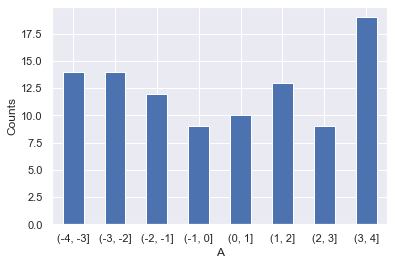

In [174]:
plot = X['C_binned'].value_counts().sort_index().plot.bar(rot=0, xlabel='A', ylabel ='Counts')

## Histograms and Density Plots


The preceding plot is not bad, but it has some issues. The most relevant one is the fact that the *gaps* between the bars have lost utility. The division we made with cut created *consecutive intervals* qith no space between them. And this plot fails to convey that. The alternative is a classic type of plot for continuous data called the histogram. We can get it with pandas method `hist`. Here we have tweaked the result a little to improve the resulting plot:

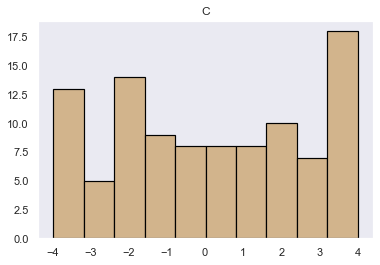

In [175]:
plot = X.hist('C', edgecolor='black', linewidth=1.2, grid=False, color = "tan")

+ But you can notice here that `hist` has chosen the number of bins for us. It is often better to do this by hand. We wil use the `C_nodes` values again:

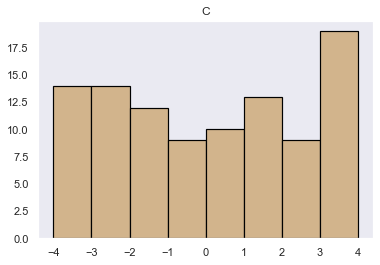

In [176]:
plot = X.hist('C', edgecolor='black', linewidth=1.2, grid=False, color = "tan", bins=C_nodes)

+ Please compare the histogram with the bar plot at the end of the previous section. And remember that instead of an explicit list of nodes, you can just give the number of bins or even let Python choose for you:

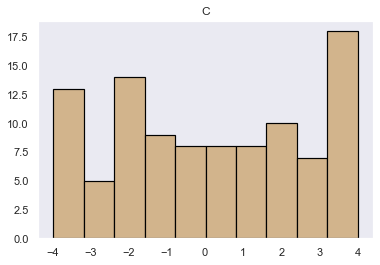

In [177]:
plot = X.hist('C', edgecolor='black', linewidth=1.2, grid=False, color = "tan")

## Discrete - Continuous Transition
+ Frequency tables, the common idea behind bar plots and histograms, become soon useless as the number of different values of a variable increases. For example, if we look at the `CarsDer` variable in the `train_accidents` DataFrame (indicates the number of derailed train cars in the accident) and we ask Python for a frequency table, we will get this answer:

In [178]:
train_accidents['CarsDer'].value_counts().sort_index()

0      1131
1       362
2       220
3       190
4       161
5       130
6        97
7        67
8        50
9        34
10       26
11       26
12       17
13       10
14       15
15        6
16       14
17        6
18        6
19        7
20        2
21        3
22        4
23        2
24        4
25        4
26        2
27        3
28        2
29        3
30        1
31        2
32        1
33        1
35        1
38        2
39        1
40        2
41        1
43        1
44        1
50        1
59        1
108       1
Name: CarsDer, dtype: int64

**Exercise:** What is the cumulative relative frequency of 10 in the previous table?

In [179]:
# %load "./exclude/S02-007.py" cumRelFreq


+ This is a common situation and it illustrates the kind of situation where the boundary between discrete and continuous variables becomes a blur. Not only the frequency table is too big to be useful. There is also the fact that the information it provides is, in this format, less and less relevant. Think about this: does it make much of a difference if the number of derailed cars was 27 instead of 26? And that kind of problem gets only worse as the number of different values increases. At some point, the information that becomes relevant is not the particular value, but the interval it belongs to. The questions we care about are *binned questions*, such as: did the accident involve more than 10 but less than 20 cars? This gives us a better picture of the accident's severity, possible cost and damages, etc. We will come back to this discussion later, when we talk about discrete and random continuous variables and their distributions. 



## Density Curves

+ A density curve is a graphical representation of the distribution of the values of a continuous variable. You can think of it as an alternative to the histogram that does not require binning. The density curve is best used when we have a large sample of values of the variable. Instead of using bars, it uses a curve. In the case of the `C` variable in `X` we can draw the density curve like this:

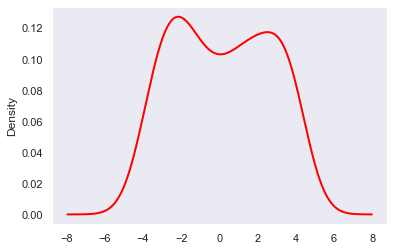

In [180]:
getPlot = X['C'].plot.density(linewidth=2, grid=False, color = "red")

   **Exercise:** using the data in the Stata file `auto2.dta` that you imported before, plot density curves for the variables `price`, `trunk`, `weight` and `gear_ratio` in that data set.

+ Sometimes we will want to combine the histogram and the density plot. We can do this with `seaborn`, adding `kde=True` to a histogram plot. The last two commands control the aesthetics of the density curve:

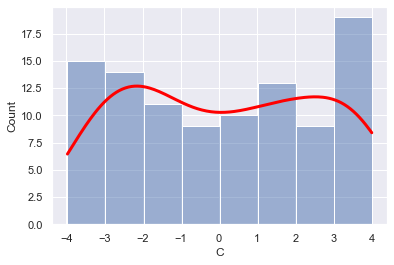

In [181]:
dens_plot = sns.histplot(data = X, x = 'C', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

+ Note that the vertical axis is `count`, indicating frequencies.  
    **Exercise:** Add the argument `stat='density'` to the sns.histplot function and see what changes in the plot.

# Distributions

+ In a previous exercise we asked you to plot the density curves for the variables the variables `price`, `trunk`, `weight` and `gear_ratio` in the `auto2` data set. If you have done the exercise you will have found curves like these:

In [182]:
auto2.head()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
densities = auto2.loc[:, ['price', 'trunk', 'weight', 'gear_ratio']].plot.density(
    subplots=True, layout=(2,2), sharex=False,sharey=False)

NameError: name 'auto2' is not defined

   Each one of these curves shows a **distribution** of values. We can think of a distribution in graphical terms as a *shape* of the data. The notion of distribution is central to Statistics and *Data Science* and we will spend part of our time learning how use them.


## Unimodal and Multimodal Distributions

+ A distribution with a single maximum (or peak), like the one below, is called a **unimodal** distribution:

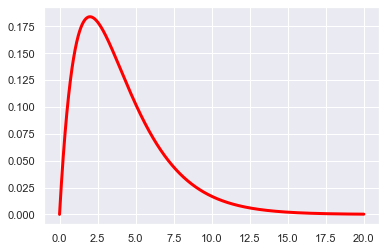

In [183]:
import scipy.stats as stats
import matplotlib.pyplot as plt
x = np.arange(0, 20, 0.001)
getPlot = plt.plot(x, stats.chi2.pdf(x, df=4), color='red', linewidth=3)

+ The density curve of a **multimodal** distribution on the other hand has more than one peak:

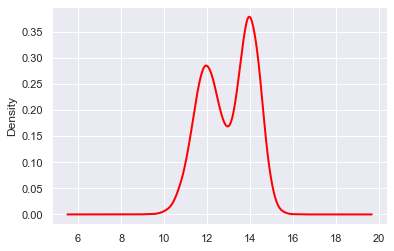

In [184]:
N = 10000
mu1 = 12
sigma1 = 0.7
mu2 = 14
sigma2 = 0.5
W1 = np.random.normal(loc = mu1, scale = sigma1, size = N)
W2 = np.random.normal(loc = mu2, scale = sigma2, size = N)
W = np.concatenate((W1, W2), axis = None)
W.shape
X2 = pd.DataFrame({'W':W})
getPlot = X2['W'].plot.density(linewidth=2, color = "red")
                  


## Symmetry and Skew

+ Symmetry is also an interesting characteristic of a distribution shape. The longest **tail** (left and right) of the distribution determines the name we use to describe it. A **right skewed** distribution is one with a long right tail, as illustrated below:

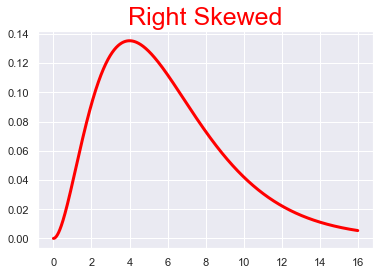

In [185]:
import scipy.stats as stats
x = np.arange(0, 16, 0.001)
plt.plot(x, stats.chi2.pdf(x, df=6), color='red', linewidth=3, )
getPlot = plt.title('Right Skewed', fontdict={'fontsize': 25, 'color':'red'})

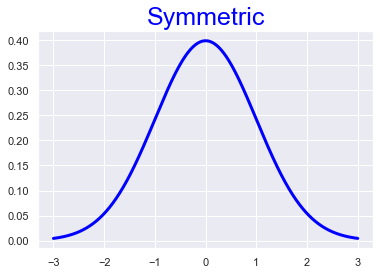

In [186]:
x = np.arange(-3, 3, 0.001)
plt.plot(x, stats.norm.pdf(x), color='blue', linewidth=3, )
getPlot = plt.title('Symmetric', fontdict={'fontsize': 25, 'color':'blue'})

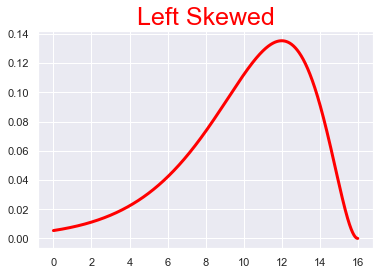

In [187]:
x = np.arange(0, 16, 0.001)
plt.plot(x, stats.chi2.pdf(16 - x, df=6), color='red', linewidth=3, )
getPlot = plt.title('Left Skewed', fontdict={'fontsize': 25, 'color':'red'})

## Distributions and Probability: an Informal Introduction

+ A histogram is a good view to visualize a continuous variable or, as we discussed before, a discrete variable with so many different values that the difference between them becomes irrelevant. In this latter case our interest shifts from individual values to intervals. 
+ A frequent question is: "If we sample random values from a data set with a given distribution, what is the probability that the sampled value will belong to a certain interval?"
+ For example, the histogram below illustrates the distribution of a discrete variable whose values range from 0 to 20. The smallest values appear with much less frequency than those close to 14, and that is why the height of the first histogram bars is almost zero. In terms of probability, if we were to pick a random value of this distribution, the most probable values would be those close to 14. 

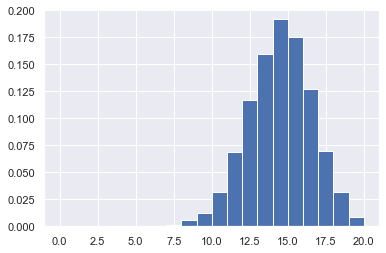

In [188]:
X3_nodes = np.arange(0, 21, 1)
X3 = np.random.binomial(n=20, p=0.7, size=10000)
getPlot = plt.hist(X3, bins=X3_nodes, density=True)

+ With the right choice of vertical scale the area of each bar in a histogram can be made to represent the relative frequency (that is, probability) of the corresponding value. Then the probability of a random value belonging to interval $[a, b]$ will be the sum of the areas of the bars in that interval. This is illustrated in the right side 
of the picture below.
+ On the other hand, for a continuous variable the distribution is described by its density curve. And then the probability of a random value belonging to $[a, b]$ is given by the *integral*, that is the area, of the density curve over that interval. 

![](fig/02-fig04-ProbabilidadIntervaloVariableDiscreta.png)

+ **Do not panic!** 
![Panic](https://media.giphy.com/media/1EghTrigJJhq8/giphy.gif)
You won't need to compute integrals (by hand) in this course. But ii is important to understand this concept: probabilities are tightly linked with areas and areas are strongly connected with integrals. That is why there is a lot of integrals underpinning the mathematical foundations of Statistics and Data Science. But whenever we need them, the computer will do the hard work for us via Python.

# Measures of Center and Spread

## The arithmetic mean

+ When working with a quantitative (numeric) variable we often try to pick a *center*, *mean* or *central value* that can act as a good representative of the typical values of the variable. A good representative of the data could be, e.g. the answer to the question: "if I were to pick a value of this variable at random, what do I expect it to be like?"

+ There are many ways of defining such central values. Each definition has its pros and cons. Here we will discuss some of the more useful ones.

+ Starting with the *arithmetic mean*. If we have a sample of $n$ values of a numeric variable $X$, say:
$$x_1, x_2, \ldots, x_n$$
then their arithmetic mean is defined by:
$$\bar X = \dfrac{x_1 + x_2 + \cdots + x_n}{n} = \dfrac{1}{n}\sum_{i=1}^n x_i$$

+ For a first example let us ask NumPy to pick 50 random numbers between 0 y 100 (with replacement) and find out their arithmetic mean. What do you expect to see as result? For reproducibility we first set the random seed generator.

In [189]:
rng = np.random.default_rng(2022)

In [190]:
x = rng.choice(101, 50, replace=True)
x
x.mean()

50.28

  Which is of course equivalent to:

In [191]:
x.sum() / x.size

50.28

+ **Exercise (very important):** Execute the previous cells (excluding the random seed) and see what results you get. Better still, do that many times (thousands of times) inside a loop or list comprehension and study the different means that you get.  **Understanding the results of this exercise is a huge step in Statistics**

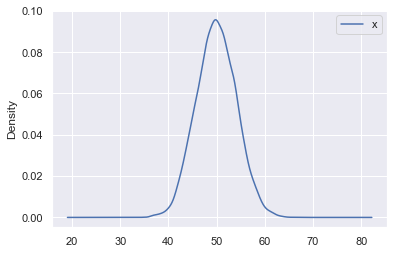

In [192]:
sample_means = pd.DataFrame([rng.choice(101, 50, replace=True).mean() for item in range(10000)], 
                            columns=['x'])
sample_means.head(10)
getPlot = sample_means.plot.density()

+ The arithmetic mean is very popular because it is very easy to compute. The mathematics behind it are simple and have many good properties. But it has a major limitation: it is severely affected by the presence of *outliers* in the data. That term describes values which are (in absolute value) abnormally big when compared with the majority of the other values. 

+ Let us look at an example. Now we will consider 100 values. But 99 of them will be random integers between 0 and 101, and the last one will be 1000. If you ran the following cell a number of times you will notice that a single value (out of 100) shifts the mean upwards by roughly 10 units. In particular, that means the in this second case the mean fails to provide a good estimation of the typical size of a value picked at random from this sample. We often describe this situation saying that the arithmetic mean is not **robust** in the presence of outliers in the data.

In [193]:
x = np.array(rng.choice(101, 99, replace=True))
print("Mean of x before appending = ", x.mean())
x = np.append(x, 1000)
print("Tail of x after appending = ", x[95:])
print("Mean of x after appending = ", x.mean())

Mean of x before appending =  50.111111111111114
Tail of x after appending =  [  69   30   61    5 1000]
Mean of x after appending =  59.61


## The median

+ The *median* aims to provide a robust representative of a numeric variable, one which is almost unaffected by the presence of outliers in our data. To get the median we sort our data and take the value in the middle of the ordered data. If the number of data values is odd then that is enough, but if it even then there is no value *in the middle*. In that case we take the median to be arithmetic mean of the largest and smallest value of the left and right halves of the data, respectively. 

+ Let us look at an example. Run the following two cells in order several times. That is, run the first one. Then try to guess the median and run the second cell to confirm your guess. 

In [194]:
x = rng.choice(101, np.random.choice([20, 21], size = 1), replace=True)
print("The NumPy array is \n", x)
print("It has ",x.size, " elements.")
print("The sorted array is \n", np.sort(x))
if(x.size % 2 == 0):
    print("Even case")
    print("The two central values are: ", np.sort(x)[9:11])
else:
    print("Odd case")

The NumPy array is 
 [10  9 78 61 49 77 70  8  7 17 35 97 24 46 80 37 77 60 41 78]
It has  20  elements.
The sorted array is 
 [ 7  8  9 10 17 24 35 37 41 46 49 60 61 70 77 77 78 78 80 97]
Even case
The two central values are:  [46 49]


In [195]:
print("The median is:",  np.median(x))

The median is: 47.5


+ Now let us check that the median is indeed robust to outliers. We repeat the same experiment as before, but now we compare the behavior of the median and the mean in the presence of an outlier:

In [196]:
x = np.array(rng.choice(101, 99, replace=True))
print("Mean of x before appending = ", x.mean())
print("Median of x before appending = ", np.median(x))
x = np.append(x, 1000)
print("Mean of x after appending = ", x.mean())
print("Median of x after appending = ", np.median(x))

Mean of x before appending =  52.696969696969695
Median of x before appending =  54.0
Mean of x after appending =  62.17
Median of x after appending =  54.0


+ **Exercise:** Run the previous cell many times to see the difference between the median and the mean. Replace the outlier with an even bigger one and repeat the experiment.

+ If the median is robust and the mean is not, why would anyone use the mean instead of the median? That is because the *mathematics of the median* are more complicated than those of the mean. It is harder to get theoretical results about the median, whereas the mean is simpler to work with. With the use of computers the median-based methods have become easier to apply, but the theoretical foundation remains harder. In practice we will often use the median as a way to gauge the influence of outliers in our work. If you have a sample where the mean and median are very similar that indicates that outliers are probably not affecting your conclusions. But if there is a big discrepancy between both values then we should start worrying about outliers and we must develop a strategy to deal with them. We will return to the management of outliers in the next sessions of the course.

## Other position values: quartiles and percentiles.

+ The median indicates the central position in our data: 50% of the data is smaller than the median and 50% is bigger. When we think of the median that way it is obvious that we can generalize the idea by considering percent values other than 50%. For example, the **quartiles** divide the (sorted) data in four parts. The *first quartile* divides the data in the smallest 25% and the rest. Similarly, the *third quartile* marks the boundary for the 75% smallest fraction of the data. And the *second quartile* is just another fancy name for the median. 

+ Once we get to that point, it is easy that we may consider any other percent value and use it to define the *percentiles*. In Python we can get any percentile with the NumPy `quantile` function (note there is a different letter in quaNtile vs quaRtile). We just need to pass a list of the percent values we want to use. For example to get the third quartiles we would do:

In [197]:
rng = np.random.default_rng(2022)
vals = rng.standard_normal(4000)
vals[0:20]
np.quantile(vals, [0.25, 0.5, 0.75])


array([-0.67130487,  0.00222268,  0.62840904])

### Max, min and range. 

+ The 0% and 100% percentiles are just the minimum and maximum values in the data. But of course we can get them with the NumPy methods `min` and `max`:

In [198]:
print(" Min = ", vals.min(), "\n Max = ", vals.max())

 Min =  -3.273947625745032 
 Max =  3.5697078782939164


+ The `range` refers to the interval between the min and max of the data. Be careful: depending on who you are talking to, or the software you use, `range` can be used to talk about the *width* of the interval (`Max - Min`) or the actual interval `[Min, Max]`. 

+ In NumPy the first version of the range (the width, a single number) can be obtained with the `ptp` method (poor choice of named, coming from *peak to peak*).  
  **Note:** for the Spanish speakers, *range* should always be translated to *recorrido*. You will often see it translated as *rango*, but that is just misleading (even though it is admitted). There is a another notion in Statistics called *rank* in English which is the one that needs to be translated as *rango*.  

In [199]:
print("Range = ", vals.ptp())

Range =  6.843655504038948


+ The **interquartilic range (iqr)** is defined as the difference (rarely also as the interval) betqeen the third and first quartiles. That is, it is the *size of an interval containing the central 50% of our data*. We can get it in Python using `scipy`:

In [200]:
import scipy.stats as stats
print(stats.iqr(vals))
# Uncomment the following line to check
# print(np.quantile(vals, 0.75) - np.quantile(vals, 0.25)) 


1.299713905814915


## Spread

+ Look at the two data sets in the picture below, labeled `a` (in blue) and `b`(in red). The value for each data point is the horizontal coordinate, but the data have been randomly shifted to avoid overlapping and thus improve the visualization (this is called *jitter*). The number of data points is the same, their means are quite similar and the range of both samples is the same. But they look very different, because of the way the data are *spread* around the center. In the `a` sample most of the data are close to the center, with only a small portion of the data spreading far way to the left and right ends of the range. On the other hand, the data in `b` are much more evenly spread all through the range, in a *uniform* way. 

+ By the way, this kind of plot where we can see individual points (often using jitter) is called a *stripplot*.

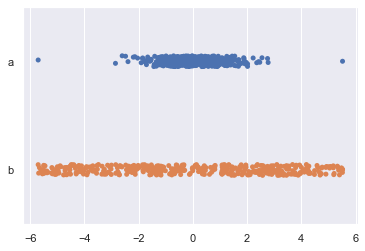

In [201]:
n = 400
A = np.array(np.random.normal(size = n))
minA = A.min()
maxA = A.max()
#A[0:10] = np.random.uniform(low = 2 * minA, high=2 * maxA, size = 10)
B = np.array(np.random.uniform(low = 2 * minA, high=2 * maxA, size = n))
A[0:2] = np.array([B.min(), B.max()])
A = np.hstack((A, B))
F = np.hstack((np.full(shape = (n,), fill_value='a'),
               np.full(shape = (n,), fill_value='b')))
# print(A.mean(), B.mean())

X3 = pd.DataFrame({'A':A, 'F':F})
#X3.head()

ax = sns.stripplot(y="F", x="A", data=X3, jitter=0.05)
getPlot = ax.set(xlabel="", ylabel="")



+ Another way to look at the idea of spread is using density curves. Again in this case the non-zero values of density are spread more widely for the red curve. Recall that the height in this curves indicates the number of values in that region. Thus the density curves carry the same  message as the stripplot above.

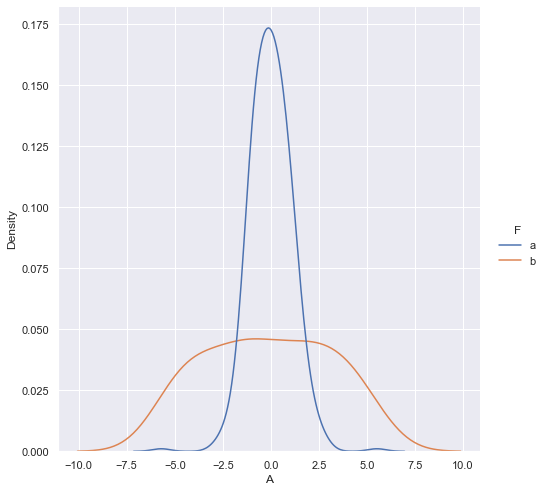

In [202]:
getPlot = sns.displot(X3, x="A", kind="kde", hue = "F", height=7, bw_adjust=1.5)

+ How do we define *spread*, in order to measure it? Just as in the case of the central values, there are several options available. 

### Median Absolute Deviation

+ Let us consider a sample of $n$ values from a numeric variable $X$: 
$$x_1, x_2, \ldots, x_n$$
If $m$ is the median of this sample, the **deviation** of a point $x_i$ is simply the distance from that point to the median:
$$d_i = \left|x_i - m\right|$$
By computing the deviation for each value in the sample we get a new set of numbers (deviations)
$$d_1, d_2, \ldots, d_n$$
and then we can define the **median absolute deviation (mad)** as the median of these distances:
$$mad(x_1, x_2, \ldots, x_n) = \operatorname{median}\left\{\left|x_i - m\right|\right\}_{i = 1}^n$$
The reason we are considering distances (by taking the absolute value) is that we never want negative deviations compensating for positive deviations when measuring the spread.

+ The median absolute deviation, much as the median, is robust to outliers but it also leads to more complicated computation and much more complicated theoretical results. Therefore we turn to the classical alternative.

### Variance and Standard Deviation

+ The first problem with the median absolute deviation is the use of the absolute value to remove the sign of the deviation. Ans that is a problem because the absolute value is not a derivable function at the origin. We can get rid of that problem by taking the square of the deviations:
$$d_i^2 = \left(\left|x_i - m\right|\right)^2 = \left(x_i - m\right)^2$$
The square removes the sign (and the absolute value) and it is a derivable function. But the problem is that now we are looking at squared deviations which, for starters, are not measured in the same units as the original data. Therefore we will need to take a square root at some point to get back to the original units.
+ But before we do that we need to choose a representative or summary measure of all this individual spreads. We could take the median of the squared deviations, but then derivability would be gone again. Therefore we take the arithmetic mean of the squared deviations and call it the **(population) variance**:
$$\sigma^2_X = \dfrac{(x_1 - \bar X)^2 + (x_2 - \bar X)^2 + \cdots + (x_n - \bar X)^2}{n} = \dfrac{1}{n}\sum_{i=1}^n (x_i - \bar X)^2$$
+ To get back to the original units we take then the square root of the variance and call it the **(population) standard deviation:**
$$\sigma_X = \sqrt{\dfrac{(x_1 - \bar X)^2 + (x_2 - \bar X)^2 + \cdots + (x_n - \bar X)^2}{n}} = \sqrt{\dfrac{1}{n}\sum_{i=1}^n (x_i - \bar X)^2}$$

### Population vs Sample Measures

+ In the last paragraphs we have defined the *population* variance and standard deviation, which were intended to describe the spread of the variable. You may have also noticed that we did no effort to compute them using Python. The reason behind this will become more and more clear in the next sessions of the course. But it ultimately has to do with the **main goal of Statistics: to exract information about a population using samples drawn from that 
population.**

+ In particular, we must accept that we will usually not have access to the whole data in the population. We wouldn't be doing Statistics in that case! And so we will be computing quantities from sample data and trying to use those quantities to **estimate unknown values  in the population**. 

+ For example, when we try to estimate the variance of a given variable in the population we will draw a sample. And then we need to use the data from that sample to obtain a numeric estimate, our best guess, of that *population variance*. The statisticians discovered long ago that if you apply to that sample the formulas from the previous section, dividing by $n$ (the size of the sample) then your guess of the population variance will tend to be off. The formulas need to be corrected if our sample-based guess of the variance is going to be a good estimator of the population variance. The correction, however, is not too big. The **sample variance** is defined simply changing $n$ by $n - 1$ in the denominator (in boldface below):
$$s^2_X = \dfrac{(x_1 - \bar X)^2 + (x_2 - \bar X)^2 + \cdots + (x_n - \bar X)^2}{\mathbf{n - 1}} = \dfrac{1}{\mathbf n - 1}\sum_{i=1}^n (x_i - \bar X)^2$$
+ And the corresponding the **sample standard deviation** is:
$$s_X = \sqrt{\dfrac{(x_1 - \bar X)^2 + (x_2 - \bar X)^2 + \cdots + (x_n - \bar X)^2}{\mathbf n - 1}} = \sqrt{\dfrac{1}{\mathbf n - 1}\sum_{i=1}^n (x_i - \bar X)^2}$$
Note that for the population definitions we used the Greek letter sigma $\sigma$ while we use the letter $s$ for the sample quantities. 

+ In Python we can get the (sample) standard deviation using the `std` method in `pandas`. For example let us find the standard deviation of the `Speed` variable in the `train_accidents` data set:

In [203]:
print("Sample variance of the speed: ", train_accidents['Speed'].var())
print("and sample standard deviation: ", train_accidents['Speed'].std())

Sample variance of the speed:  321.96633328576297
and sample standard deviation:  17.943420334088007


+ The sample formulas are the ones we will be using most of the time (after all, our starting point will always be a sample). But if you ever need to apply the population formulas you can do so with the `ddof` argument of the previous formulas. 

In [204]:
print("Sample variance of the speed: ", train_accidents['Speed'].var(ddof = 0))
print("and sample standard deviation: ", train_accidents['Speed'].std(ddof = 0))

Sample variance of the speed:  321.8434922581835
and sample standard deviation:  17.939996997162055


In samples of this size the difference between the two quantities is really small, but it becomes more and more relevant as the sample size decreases. That is a constant theme in Statistics: as the sample size decreases the quality of the information does the same and the computation must take that into account. 

## The Pandas describe function

+ When we start exploring a new data set one of the first things we will do is to get some initial information about the distributions of the numerical variables in the data. We will use plots, but we in particular we will also get for each variable the common center, position and spread values we have been discussing. In the most common scenario, where the data is stored in a pandas DataFrame, there is a convenient function aptly called `describe` that will return many of those center and position values for all the numeric variables. You can force it to consider also factors, but the output in that case is not nearly as useful, so we will not discuss it here.

+ Let us see how it looks like for the `train_accidents` data set:

In [205]:
train_accidents.describe()

,Acident,Month,Day,EqpDamg,TrkDamg,Killed,Injured,Speed,LocosDer,CarsDer
count,2621.000000,2621.000000,2621.000000,2.621000e+03,2.621000e+03,2621.000000,2621.000000,2621.000000,2621.000000,2621.000000
mean,1041.887448,6.400229,15.212133,7.043300e+04,3.082591e+04,0.012209,0.110645,12.277757,0.136208,2.903853
std,598.174569,3.453462,8.735032,2.485780e+05,1.035951e+05,0.126021,0.901211,17.943420,0.481083,5.449272
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,528.000000,3.000000,8.000000,5.000000e+03,0.000000e+00,0.000000,0.000000,3.000000,0.000000,0.000000
50%,1039.000000,6.000000,15.000000,1.500000e+04,1.400000e+03,0.000000,0.000000,6.000000,0.000000,1.000000
75%,1565.000000,9.000000,23.000000,3.753800e+04,1.551600e+04,0.000000,0.000000,10.000000,0.000000,4.000000
max,2067.000000,12.000000,31.000000,3.200000e+06,1.929657e+06,3.000000,28.000000,150.000000,5.000000,108.000000


## Boxplots and the definition of outliers.

+ Boxplots are a popular form of graphical representation of the position measures of a set of numeric values. They are also called *box and whiskers* plots for reasons that will become immediately aparent. The structure of a boxplot is illustrated in the following picture:

![](fig/02-fig05-BoxPlotEstructura.png)

As you can see one axis (in this case the vertical one) is chosen to represent the scale of your variable. The central 50% of the values is represented by a rectangular box (the width of the box in the other dimension is irrelevant). The bottom and top of the box correspond to the first and third quartiles, while the thick line inside the box indicates the position of the median. The segments coming out of the box are the so called *whiskers*. They connect the box with the more extreme non-outliers in your data. The outliers themselves, if they exist, are represented as dots disconnected from the box. 

+ **Definition of Outlier:** The previous discussion assumes that we know how to tell if a value is or not an outlier. There are many possible notions of outlier, but the most popular one and which is used to draw this boxplot is as follows: a value is an **outlier** if the distance from that value to the closest side of the box is bigger than 1.5 times the iqr.

+ To draw a boxplot of the values of a column in a pandas DataFrame we can use the `box` method as follows. Here we look at the `price` variable in the `auto2` data set:

In [206]:
# getPlot = auto2['price'].plot.box(figsize=(10, 8))
getPlot = auto2.boxplot(column='price', figsize=(6, 8))

NameError: name 'auto2' is not defined

+ If you want to locate the outliers in this variable you can proceed as follows:

In [207]:
price_iqr = stats.iqr(auto2.price)
price_q1, price_q3 = np.quantile(auto2.price, [0.25, 0.75])

cut_low = price_q1 - 1.5 * price_iqr
cut_high = price_q3 + 1.5 * price_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

price_outliers = auto2.loc[(auto2.price < cut_low) | (auto2.price > cut_high)]

print("The outliers are")

price_outliers


NameError: name 'auto2' is not defined

+ Sometimes we will we interested in getting the boxplots for many numeric variables in the table at once. The code below shows how to do that for some of the variables in `auto2`.  
**IMPORTANT:** remember to check if you use different scale axis for variables that measure different quantities. In such case the `sharex` or `sharey` arguments become essential.

In [208]:
ax = auto2.loc[:, ["price","mpg", "weight", "length"]].plot.box(
    subplots=True, layout=(2,2), sharex=False, sharey=False)

NameError: name 'auto2' is not defined

+ **Violinplots** are a good complement to boxplots. They combine two symmetrical copies of the density curve with a boxplot, and thus overcome some of the limitations of a boxplot. For exampe, if the density curve is bimodal it is often hard to detect that in the boxplot, but the density curve will let us see that. For the `price` variable in `auto2` we get:

In [209]:
ax = sns.violinplot(x = 'price', data=auto2, width=0.3, alpha=0.03, color = "tan")

NameError: name 'auto2' is not defined

+ The default version of the violinplot in `seaborn` draws a mini-boxplot. If you would like to make it bigger you can remove that mini-box (with `inner=None`) and add a regular boxplot (playing with transparency and colors to get what you want, see [this link](https://stackoverflow.com/questions/62597959/seaborn-violinplot-transparency)):

In [210]:
ax = sns.boxplot(x = 'price', data=auto2, width=0.5, color="orange", boxprops=dict(alpha=.3))
ax = sns.violinplot(x = 'price', data=auto2, width=0.3, color = "tan", inner=None)
for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

NameError: name 'auto2' is not defined

# Factors

+ *Factors*, also called *qualitative*, *categorical* or *class* variables are used mainly to create groups or categories of observations. Many of the data sets that we have seen or will see include factors. And recognizing that a variable should be considered as a factor is a key step in a well designed data science process. 

+ When we tell Python to treat a variable as a factor it will not only save some memory. Much more importantly, many methods in Statistics or Machine Learning behave differently when the input variable is a factor. Therefore we must always take some time in the exploratory analysis of the data to detect factors and let Python be aware of them.

+ Quite often, when you import data from an external source you will find that some factors have been coded as a different data type (e.g. integers or `objects`). For example let us recall the data types in the `train_accidents` data set:

In [211]:
train_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Acident   2621 non-null   int64 
 1   Railroad  2621 non-null   object
 2   Month     2621 non-null   int64 
 3   Day       2621 non-null   int64 
 4   State     2621 non-null   object
 5   County    2621 non-null   object
 6   TrkType   2621 non-null   object
 7   TrkMnt    2621 non-null   object
 8   AccType   2621 non-null   object
 9   AccCause  2621 non-null   object
 10  EqpDamg   2621 non-null   int64 
 11  TrkDamg   2621 non-null   int64 
 12  Killed    2621 non-null   int64 
 13  Injured   2621 non-null   int64 
 14  RREquip   2621 non-null   object
 15  Speed     2621 non-null   int64 
 16  LocosDer  2621 non-null   int64 
 17  CarsDer   2621 non-null   int64 
dtypes: int64(10), object(8)
memory usage: 368.7+ KB


+ Let us focus in two columns, `TrkType` and `AccType`.  Their absolute frequency tables are:

In [212]:
print(train_accidents.TrkType.value_counts().sort_index(), "\n"*3, 
      train_accidents.AccType.value_counts().sort_index())

Industry      247
Main          975
Not rptd        3
Siding         56
Yard         1340
Name: TrkType, dtype: int64 


 Coll      251
Der      1543
Oth       827
Name: AccType, dtype: int64


+ Think about these variables. Even their names are telling us that they divide the data into different classes or types. Therefore we **must** treat them as factors, otherwise our analysis will miss some useful information an will not be able to benefit from all the power of the statistical methods. 
+ Converting a few columns of a DataFrame to factors is easy with the `astype` method:

In [213]:
train_accidents = train_accidents.astype({'TrkType':'category', 
                                          'AccType':'category'})


df = pd.DataFrame({'a': [1, 2] * 3,
                   'b': [True, False] * 3,
                   'c1': [1.0, 2.0] * 3,
                   'c2': [1.0, 2.0] * 3,
                   'd': ['A', 'B'] * 3})

+ If we now look at the data types we see that these two variables are now factors (of `category` type).

In [214]:
print(train_accidents.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Acident   2621 non-null   int64   
 1   Railroad  2621 non-null   object  
 2   Month     2621 non-null   int64   
 3   Day       2621 non-null   int64   
 4   State     2621 non-null   object  
 5   County    2621 non-null   object  
 6   TrkType   2621 non-null   category
 7   TrkMnt    2621 non-null   object  
 8   AccType   2621 non-null   category
 9   AccCause  2621 non-null   object  
 10  EqpDamg   2621 non-null   int64   
 11  TrkDamg   2621 non-null   int64   
 12  Killed    2621 non-null   int64   
 13  Injured   2621 non-null   int64   
 14  RREquip   2621 non-null   object  
 15  Speed     2621 non-null   int64   
 16  LocosDer  2621 non-null   int64   
 17  CarsDer   2621 non-null   int64   
dtypes: category(2), int64(10), object(6)
memory usage: 333.2+ KB
None


+ You can learn more about [factors in pandas in this link](https://pandas.pydata.org/docs/user_guide/categorical.html). And we will learn through practice how to deal with them in the next sessions.

+ The above method works fine if you only need to change a few columns to factor type. But if you need to batch convert a lot of columns then you can do so using the `select_dtypes` to select only those columns with `object` type. Note that you may have to exclude the purely character string columns before the conversion into factors.  The following example does this for the movies data set:

In [215]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


+ We want to convert `Genre` and `Lead Studio` to factors, but no `Film` (which is a title) or `Worlwide Gross` that is really numeric but needs a special treatment (we'll see about that later in the course). 

In [216]:
factorCols = movies.select_dtypes(include='object').iloc[:, 1:3].columns
print(factorCols)

Index(['Genre', 'Lead Studio'], dtype='object')


In [217]:
movies.loc[:, factorCols] = movies.loc[:, factorCols].astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Film               77 non-null     object  
 1   Genre              77 non-null     category
 2   Lead Studio        77 non-null     category
 3   Audience score %   77 non-null     int64   
 4   Profitability      77 non-null     float64 
 5   Rotten Tomatoes %  77 non-null     int64   
 6   Worldwide Gross    77 non-null     object  
 7   Year               77 non-null     int64   
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 4.9+ KB
